In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

19364


In [4]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
_font_size = 7.5

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [7]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print("PostAnalysis Folder:", postanalysis_folder)
figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print("Figure Folder:", figure_folder)

contact_figure_folder = os.path.join(figure_folder, 'LongRangeContacts')
if not os.path.exists(contact_figure_folder):
    print(f"Create contact_figure_folder: {contact_figure_folder}")
    os.makedirs(contact_figure_folder)
else:
    print(f"Use contact_figure_folder: {contact_figure_folder}")
comp_figure_folder = os.path.join(figure_folder, 'AB_compartments')
if not os.path.exists(comp_figure_folder):
    print(f"Create comp_figure_folder: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use comp_figure_folder: {comp_figure_folder}")

PostAnalysis Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
Figure Folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use contact_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\LongRangeContacts
Use comp_figure_folder: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\AB_compartments


## load codebook

In [8]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

In [9]:
sort_by_region = False
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=sort_by_region)

## Load coordinates for subtypes

In [10]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

## load ensemble AB

In [12]:
# save
ensemble_pc1_filename = os.path.join(postanalysis_folder, 'ensemble_pc1.npy')

ensemble_normed_PC1 = np.load(ensemble_pc1_filename)
print(ensemble_normed_PC1.shape)

(1981,)


In [15]:
# define AB
ensemble_AB_dict = {}
AB_th = -0.5
ensemble_AB_dict['A'] = np.where(ensemble_normed_PC1 > AB_th)[0]
ensemble_AB_dict['B'] = np.where(ensemble_normed_PC1 <= AB_th)[0]

# by chr
ensemble_chr_2_AB = {}
for _chr in chr_2_indices:
    _chr_AB = {
        'A':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['A'])], dtype=np.int32),
        'B':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['B'])], dtype=np.int32),
    }
    ensemble_chr_2_AB[_chr] = _chr_AB

# 1. calculate overall AB density for ensemble AB calling

In [7]:
# output from previous AB calling
subclass_2_normedPC1_filename = os.path.join(postanalysis_folder, 'subclass_2_normedPC1.pkl')
subclass_2_normedContactMat_filename = os.path.join(postanalysis_folder, 'subclass_2_normedContactMat.pkl')
subclass_2_corrMat_filename = os.path.join(postanalysis_folder, 'subclass_2_corrMat.pkl')

In [16]:
from tqdm import tqdm
from ImageAnalysis3.compartment_tools.density import BatchCompartmentDensities
reload(ia.compartment_tools.density)

<module 'ImageAnalysis3.compartment_tools.density' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\compartment_tools\\density.py'>

{'1': [array([[         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [  7.82630513, 413.0891512 , 466.9194472 ],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [  7.986511  , 412.8478378 , 467.4374584 ],
         [  7.75808217, 413.5028686 , 467.3621824 ],
         [         nan,          nan,          nan],
         [  8.07374425, 412.9849582 , 465.8170318 ],
         [  7.03503425, 412.7056378 , 465.3403036 ],
         [         nan,          nan,          nan],
         [  7.21803875, 412.8762166 , 464.7967072 ],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [  6.50067517, 412.8860626 , 464.0743096 ],
         [         nan,          nan,          nan],
         [  5.74848667, 412.606033  , 465

In [21]:
_chr2ZxysList = subclass_2_chr2ZxysList['Oligo'][0]

{'1': {'A': array([[           nan,            nan,            nan, 1.15859640e+00,
                     nan,            nan, 5.70091453e-01, 1.05095291e+00,
                     nan, 4.96984796e+00, 7.04428515e+00,            nan,
          6.55047914e+00,            nan,            nan,            nan,
          4.50233856e+00,            nan, 1.50230577e+00, 4.46422146e+00,
                     nan,            nan, 8.02253458e+00, 7.28633914e+00,
          3.60035492e+00,            nan,            nan,            nan,
          5.52855213e+00, 5.53249454e+00,            nan,            nan,
          7.62901603e+00,            nan,            nan,            nan,
          1.89010785e+00, 6.19285566e+00,            nan,            nan,
                     nan, 7.21809257e+00,            nan, 6.08018537e+00,
                     nan,            nan,            nan, 7.65867917e+00,
          5.85496496e+00,            nan, 3.84068009e+00,            nan,
                     nan, 7.

In [43]:
reload(ia.compartment_tools.density)

<module 'ImageAnalysis3.compartment_tools.density' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\compartment_tools\\density.py'>

In [44]:
_trans_scores = []
for _i, _chr2ZxysList in enumerate(subclass_2_chr2ZxysList['Oligo']):
    _trans_scores.append(
        ia.compartment_tools.density.calculate_compartment_densities(_chr2ZxysList, ensemble_chr_2_AB, 0.5)
    )

KeyboardInterrupt: 

In [41]:
_chr2ZxysList

{'6': [array([[         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [ 11.72771975, 376.0090144 , 524.2358734 ],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [ 10.26640212, 376.1955196 , 523.5358012 ],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [ 11.11025783, 375.8749378 , 523.843504  ],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [ 10.60207875, 375.1700164 , 523.3707826 ],
         [         nan,          nan,          nan],
         [         nan,          nan,          nan],
         [  9.093089  , 373.2245422 , 523.5348454 ],
         [         nan,          nan,          nan],
         [         nan,          nan,    

In [46]:
gaussian_radius = 0.5 # um
normalize_by_reg_num = False
num_threads=32

subclass_2_transScoreDicts = {}
subclass_2_cisScoreDicts = {}
for _sel_class in subclass_2_chr2ZxysList:
    print(_sel_class, end =' ')
    _class_start = time.time()
    subclass_2_transScoreDicts[_sel_class] = BatchCompartmentDensities(
        subclass_2_chr2ZxysList[_sel_class], ensemble_chr_2_AB, 
        gaussian_radius, num_threads=num_threads,
        normalize_by_reg_num=normalize_by_reg_num,)
    subclass_2_cisScoreDicts[_sel_class] = BatchCompartmentDensities(
        subclass_2_chr2ZxysList[_sel_class], ensemble_chr_2_AB, 
        gaussian_radius, num_threads=num_threads,
        normalize_by_reg_num=normalize_by_reg_num,
        use_cis=True, use_trans=False)
    #
    print(f"in {time.time()-_class_start:.2f}s. ")

Oligo in 201.50s. 
L6b in 45.97s. 
Astro in 107.55s. 
VLMC in 36.44s. 
OPC in 72.35s. 
Endo in 95.98s. 
L6 CT in 137.58s. 
Peri in 54.73s. 
Micro in 75.10s. 
L6 IT in 68.55s. 
Sncg in 28.42s. 
L2/3 IT in 80.42s. 
Sst in 45.02s. 
L5 IT in 64.74s. 
Vip in 35.58s. 
Pvalb in 50.35s. 
Lamp5 in 34.05s. 
L5/6 NP in 40.64s. 
L5 ET in 45.86s. 
L4/5 IT in 83.94s. 
SMC in 39.08s. 
other in 30.12s. 


In [47]:
cisABscores_ensemble_filename = os.path.join(postanalysis_folder, f'cisABscores_ensembleAB_notNorm_r{gaussian_radius}.pkl')
if not os.path.exists(cisABscores_ensemble_filename):
    print(cisABscores_ensemble_filename)
    pickle.dump(subclass_2_cisScoreDicts, open(cisABscores_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\cisABscores_ensembleAB_notNorm_r0.5.pkl


In [48]:
transABscores_ensemble_filename = os.path.join(postanalysis_folder, f'transABscores_ensembleAB_notNorm_r{gaussian_radius}.pkl')
if not os.path.exists(transABscores_ensemble_filename):
    print(transABscores_ensemble_filename)
    pickle.dump(subclass_2_transScoreDicts, open(transABscores_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\transABscores_ensembleAB_notNorm_r0.5.pkl


In [49]:
# convert into dict
subclass_2_cisABRatioDicts = {}
# loop
for _class, _scoreDicts in subclass_2_cisScoreDicts.items():
    print(_class, len(_scoreDicts))
    
    _ABratioDicts = [] 
    for _scoreDict in _scoreDicts:
        _chr_2_abratios = {}
        for _chr, _chr_AB_dict in _scoreDict.items():
            _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])
            _chr_2_abratios[_chr] = _AB_ratios
        # append
        _ABratioDicts.append(_chr_2_abratios)
    # assign
    subclass_2_cisABRatioDicts[_class] = _ABratioDicts

Oligo 4765


C:\Users\puzheng\AppData\Local\Temp/ipykernel_19364/3846046256.py:11: RuntimeWarning: divide by zero encountered in log
  _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])


L6b 741
Astro 3822
VLMC 444
OPC 1568
Endo 2891
L6 CT 4234
Peri 738
Micro 1523
L6 IT 1837
Sncg 133
L2/3 IT 3095
Sst 746
L5 IT 2014
Vip 357
Pvalb 993
Lamp5 339
L5/6 NP 596
L5 ET 1202
L4/5 IT 2398
SMC 434
other 311


In [50]:
cisABratio_ensemble_filename = os.path.join(postanalysis_folder, f'cisABRatio_ensembleAB_notNorm_r{gaussian_radius}.pkl')
if not os.path.exists(cisABratio_ensemble_filename):
    print(cisABratio_ensemble_filename)
    pickle.dump(subclass_2_cisABRatioDicts, open(cisABratio_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\cisABRatio_ensembleAB_notNorm_r0.5.pkl


In [51]:
# convert into dict
subclass_2_transABRatioDicts = {}
# loop
for _class, _scoreDicts in subclass_2_transScoreDicts.items():
    print(_class, len(_scoreDicts))
    
    _ABratioDicts = [] 
    for _scoreDict in _scoreDicts:
        _chr_2_abratios = {}
        for _chr, _chr_AB_dict in _scoreDict.items():
            _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])
            _chr_2_abratios[_chr] = _AB_ratios
        # append
        _ABratioDicts.append(_chr_2_abratios)
    # assign
    subclass_2_transABRatioDicts[_class] = _ABratioDicts

Oligo 4765
L6b 741
Astro 3822
VLMC 444
OPC 1568
Endo 2891
L6 CT 4234
Peri 738
Micro 1523
L6 IT 1837
Sncg 133
L2/3 IT 3095
Sst 746
L5 IT 2014
Vip 357
Pvalb 993
Lamp5 339
L5/6 NP 596
L5 ET 1202
L4/5 IT 2398
SMC 434
other 311


In [52]:
transABratio_ensemble_filename = os.path.join(postanalysis_folder, f'transABRatio_ensembleAB_notNorm_r{gaussian_radius}.pkl')
if not os.path.exists(transABratio_ensemble_filename):
    print(transABratio_ensemble_filename)
    pickle.dump(subclass_2_transABRatioDicts, open(transABratio_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\transABRatio_ensembleAB_notNorm_r0.5.pkl


In [53]:
gaussian_radius

0.5

# Normalized version

In [52]:
from tqdm import tqdm
from ImageAnalysis3.compartment_tools.density import BatchCompartmentDensities
reload(ia.compartment_tools.density)

<module 'ImageAnalysis3.compartment_tools.density' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\compartment_tools\\density.py'>

In [53]:
gaussian_radius = 500 # nm
normalize_by_reg_num = True

subclass_2_transScoreDicts = {}
subclass_2_cisScoreDicts = {}
for _sel_class in class_2_zxysDict:
    print(_sel_class, end =' ')
    _class_start = time.time()
    subclass_2_transScoreDicts[_sel_class] = BatchCompartmentDensities(
        class_2_zxysDict[_sel_class], ensemble_chr_2_AB, gaussian_radius, normalize_by_reg_num=normalize_by_reg_num,)
    subclass_2_cisScoreDicts[_sel_class] = BatchCompartmentDensities(
        class_2_zxysDict[_sel_class], ensemble_chr_2_AB, gaussian_radius, normalize_by_reg_num=normalize_by_reg_num,
        use_cis=True, use_trans=False)
    #
    print(f"in {time.time()-_class_start:.2f}s. ")

Astro in 417.95s. 
Endo-PVM in 331.93s. 
L2/3 IT in 344.71s. 
L4/5 IT in 247.47s. 
L5 ET in 119.92s. 
L5 IT in 188.09s. 
L5/6 NP in 85.10s. 
L6 CT in 526.81s. 
L6 IT in 190.39s. 
L6b in 81.71s. 
Lamp5 in 56.96s. 
Micro in 194.87s. 
OPC in 182.51s. 
Oligo in 490.81s. 
Peri in 79.73s. 
Pvalb in 142.83s. 
SMC in 101.98s. 
Sncg in 31.79s. 
Sst in 104.53s. 
VLMC in 52.58s. 
Vip in 54.56s. 


In [54]:
cisABscores_ensemble_filename = os.path.join(postanalysis_folder, f'cisABscores_ensembleAB_Norm_r{gaussian_radius}.pkl')
if not os.path.exists(cisABscores_ensemble_filename):
    print(cisABscores_ensemble_filename)
    pickle.dump(subclass_2_cisScoreDicts, open(cisABscores_ensemble_filename, 'wb'))
transABscores_ensemble_filename = os.path.join(postanalysis_folder, f'transABscores_ensembleAB_Norm_r{gaussian_radius}.pkl')
if not os.path.exists(transABscores_ensemble_filename):
    print(transABscores_ensemble_filename)
    pickle.dump(subclass_2_transScoreDicts, open(transABscores_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\cisABscores_ensembleAB_Norm_r500.pkl
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\transABscores_ensembleAB_Norm_r500.pkl


In [55]:
# convert into dict
subclass_2_cisABRatioDicts = {}
# loop
for _class, _scoreDicts in subclass_2_cisScoreDicts.items():
    print(_class, len(_scoreDicts))
    
    _ABratioDicts = [] 
    for _scoreDict in _scoreDicts:
        _chr_2_abratios = {}
        for _chr, _chr_AB_dict in _scoreDict.items():
            _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])
            _chr_2_abratios[_chr] = _AB_ratios
        # append
        _ABratioDicts.append(_chr_2_abratios)
    # assign
    subclass_2_cisABRatioDicts[_class] = _ABratioDicts

Astro 2533
Endo-PVM 1663
L2/3 IT 2358
L4/5 IT 1606
L5 ET 833
L5 IT 1289
L5/6 NP 457
L6 CT 3078
L6 IT 1159
L6b 408
Lamp5 282
Micro 877
OPC 989
Oligo 2417


C:\Users\puzheng\AppData\Local\Temp\2\ipykernel_32952\3846046256.py:11: RuntimeWarning: divide by zero encountered in log
  _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])
C:\Users\puzheng\AppData\Local\Temp\2\ipykernel_32952\3846046256.py:11: RuntimeWarning: invalid value encountered in double_scalars
  _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])


Peri 338
Pvalb 825
SMC 471
Sncg 138
Sst 599
VLMC 252
Vip 283


In [56]:
cisABratio_ensemble_filename = os.path.join(postanalysis_folder, f'cisABRatio_ensembleAB_Norm_r{gaussian_radius}.pkl')
if not os.path.exists(cisABratio_ensemble_filename):
    print(cisABratio_ensemble_filename)
    pickle.dump(subclass_2_cisABRatioDicts, open(cisABratio_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\cisABRatio_ensembleAB_Norm_r500.pkl


In [57]:
# convert into dict
subclass_2_transABRatioDicts = {}
# loop
for _class, _scoreDicts in subclass_2_transScoreDicts.items():
    print(_class, len(_scoreDicts))
    
    _ABratioDicts = [] 
    for _scoreDict in _scoreDicts:
        _chr_2_abratios = {}
        for _chr, _chr_AB_dict in _scoreDict.items():
            _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])
            _chr_2_abratios[_chr] = _AB_ratios
        # append
        _ABratioDicts.append(_chr_2_abratios)
    # assign
    subclass_2_transABRatioDicts[_class] = _ABratioDicts

Astro 2533
Endo-PVM 1663
L2/3 IT 2358
L4/5 IT 1606
L5 ET 833
L5 IT 1289
L5/6 NP 457
L6 CT 3078
L6 IT 1159
L6b 408
Lamp5 282
Micro 877
OPC 989
Oligo 2417


C:\Users\puzheng\AppData\Local\Temp\2\ipykernel_32952\932551879.py:11: RuntimeWarning: divide by zero encountered in log
  _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])
C:\Users\puzheng\AppData\Local\Temp\2\ipykernel_32952\932551879.py:11: RuntimeWarning: invalid value encountered in double_scalars
  _AB_ratios = np.log(_chr_AB_dict['A']) - np.log(_chr_AB_dict['B'])


Peri 338
Pvalb 825
SMC 471
Sncg 138
Sst 599
VLMC 252
Vip 283


In [58]:
transABratio_ensemble_filename = os.path.join(postanalysis_folder, f'transABRatio_ensembleAB_Norm_r{gaussian_radius}.pkl')
if not os.path.exists(transABratio_ensemble_filename):
    print(transABratio_ensemble_filename)
    pickle.dump(subclass_2_transABRatioDicts, open(transABratio_ensemble_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\transABRatio_ensembleAB_Norm_r500.pkl


<IPython.core.display.Javascript object>


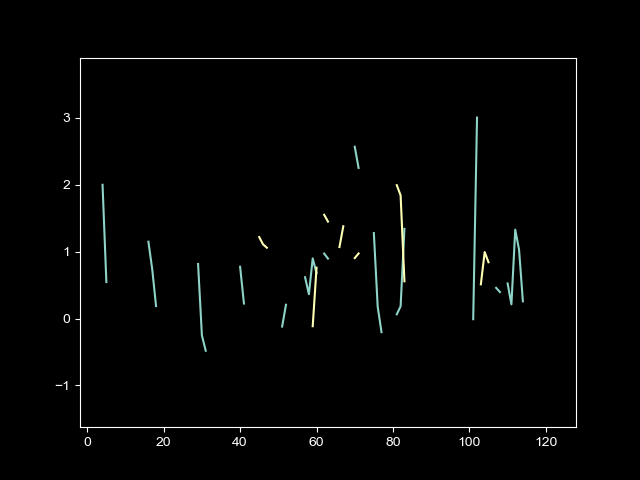

In [56]:
plt.plot(subclass_2_transABRatioDicts['Astro'][1]['3'].transpose())

# 2D rendering of a example cell

In [58]:
sel_subclass = 'L2/3 IT'
sel_cell_indices = []
for _cell_index, _chr2Zxys in enumerate(subclass_2_chr2ZxysList[sel_subclass]):
    if len(_chr2Zxys) >= 20:
        sel_cell_indices.append(_cell_index)


'L2/3 IT'

In [142]:
subclass_2_cisScoreDicts[sel_subclasses][_sel_cell_ind]

{'1': {'A': array([[           nan,            nan,            nan,            nan,
                     nan, 3.74410036e-01,            nan, 2.17510321e+00,
                     nan, 5.08150070e-01, 1.59775584e+00,            nan,
          4.28435382e+00, 1.55096048e+00,            nan, 1.35943481e+00,
                     nan, 1.25626354e+00, 1.73951229e+00,            nan,
                     nan, 1.77435224e+00,            nan, 1.71296827e+00,
                     nan, 2.35662424e+00, 1.95605947e+00,            nan,
                     nan, 8.45910983e-01,            nan,            nan,
          6.49707760e+00,            nan, 6.67864235e+00, 4.41168060e+00,
          4.67348418e+00,            nan,            nan,            nan,
          3.29776029e+00,            nan,            nan, 3.09785630e+00,
                     nan,            nan, 1.28109986e+00,            nan,
                     nan,            nan, 3.01865612e+00,            nan,
          3.22438280e+00, 3.

In [144]:
def summarize_chr2Zxys(chr_2_zxys_list, codebook_df, keep_valid=False):
    # generate an order and sort by chr
    _chr_2_indices, _ = distance.Generate_PlotOrder(codebook_df, codebook_df, sort_by_region=False) 
    _merged_zxys = []
    _merged_region_ids = []
    
    for _chr_name, _chr_inds in chr_2_indices.items():
        if _chr_name in chr_2_zxys_list:
            _zxys_list = chr_2_zxys_list[_chr_name]
            for _zxys in _zxys_list:
                if keep_valid:
                    if len(np.shape(_zxys)) == 2:
                        _valid_flags = np.isfinite(_zxys).all(1)
                    else:
                        _valid_flags = np.isfinite(_zxys)
                    _merged_zxys.append(_zxys[_valid_flags])
                    _merged_region_ids.append(_chr_inds[_valid_flags])
                else:
                    _merged_zxys.append(_zxys)
                    _merged_region_ids.append(_chr_inds)
    return np.concatenate(_merged_zxys), np.concatenate(_merged_region_ids)

        
        

In [172]:
_sel_cell_ind = sel_cell_indices[1]
_chr2Zxys = subclass_2_chr2ZxysList[sel_subclasses][_sel_cell_ind]
_centered_chr2Zxys = ia.figure_tools.plot_decode.Centering_Chr2ZxysListDict(_chr2Zxys)
_chr2cisABratios = subclass_2_cisABRatioDicts[sel_subclasses][_sel_cell_ind]
_chr2transABratios = subclass_2_transABRatioDicts[sel_subclasses][_sel_cell_ind]
_cell_zxys, _cell_rids = summarize_chr2Zxys(_centered_chr2Zxys, codebook, keep_valid=True)
_cell_cisABratios, _ = summarize_chr2Zxys(_chr2cisABratios, codebook, keep_valid=True)
_cell_transABratios, _ = summarize_chr2Zxys(_chr2transABratios, codebook, keep_valid=True)


In [173]:
_slice_flags = (_cell_zxys[:,0] >= -1) & (_cell_zxys[:,0] < 1) 

<IPython.core.display.Javascript object>


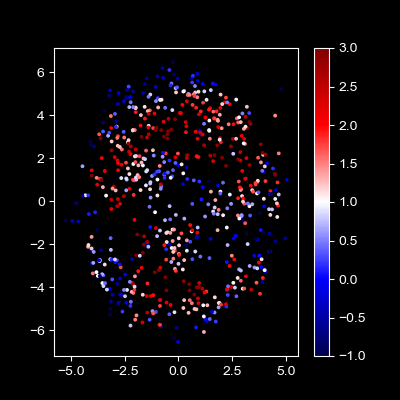

In [174]:
fig, ax = plt.subplots(figsize=(4,4))
_pf = ax.scatter(_cell_zxys[_slice_flags,1], _cell_zxys[_slice_flags,2], 
                 c=_cell_transABratios[_slice_flags], s=3, cmap='seismic', vmin=-1, vmax=3)
ax.set_aspect('equal')

plt.colorbar(_pf, ax=ax)

<IPython.core.display.Javascript object>


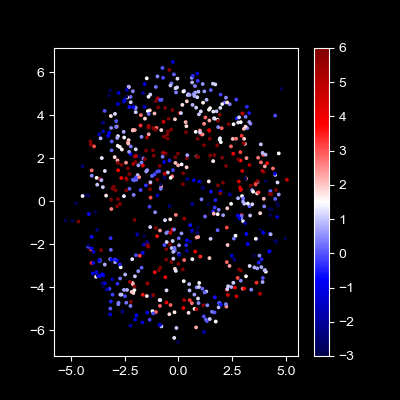

In [179]:
fig, ax = plt.subplots(figsize=(4,4))
_pf = ax.scatter(_cell_zxys[_slice_flags,1], _cell_zxys[_slice_flags,2], 
                 c=_cell_cisABratios[_slice_flags], s=3, cmap='seismic', vmin=-3,vmax=6)
ax.set_aspect('equal')

plt.colorbar(_pf, ax=ax)

<IPython.core.display.Javascript object>


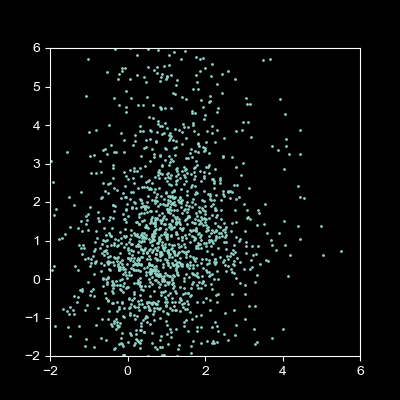

(-2.0, 6.0)

In [186]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(_cell_transABratios, _cell_cisABratios, s=1)
ax.set_xlim([-2, 6])
ax.set_ylim([-2, 6])

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
_pf = ax.scatter(_cell_zxys[_slice_flags,1], _cell_zxys[_slice_flags,2], 
                 c=_cell_transABratios[_slice_flags], s=3, cmap='seismic', vmin=-1, vmax=3)
ax.set_aspect('equal')

plt.colorbar(_pf, ax=ax)

<IPython.core.display.Javascript object>


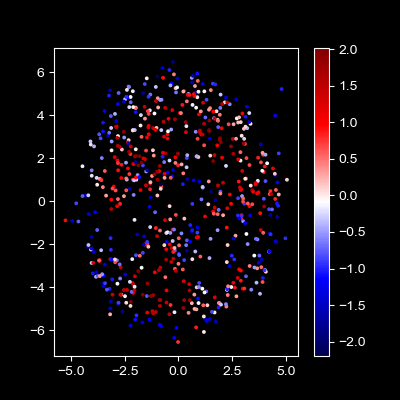

In [164]:
fig, ax = plt.subplots(figsize=(4,4))
_pf = ax.scatter(_cell_zxys[_slice_flags,1], _cell_zxys[_slice_flags,2], 
                 c=ensemble_normed_PC1[_cell_rids[_slice_flags]], s=3, cmap='seismic')
ax.set_aspect('equal')

plt.colorbar(_pf, ax=ax)

<IPython.core.display.Javascript object>


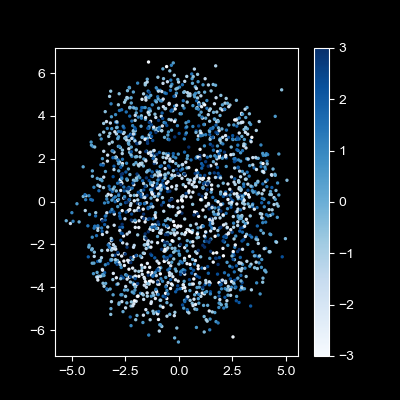

In [167]:
fig, ax = plt.subplots(figsize=(4,4))
_pf = ax.scatter(_cell_zxys[:,1], _cell_zxys[:,2], c=_cell_zxys[:,0], s=2, 
                 cmap='Blues', vmin=-3, vmax=3)
ax.set_aspect('equal')
plt.colorbar(_pf, ax=ax)